### **Imports and drive mount**

In [65]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

### **Gradient Descent with 4k+ data**

In [66]:
data = pd.read_csv('F:\\OneDrive - Shahjalal University of Science and Technology\\Windows\\Desktop\\ML assignments\\4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [67]:
columns_to_drop = ['Posted On', 'Floor', 'Area Locality', 'City', 'Tenant Preferred', 'Point of Contact']
data.drop(columns=columns_to_drop, inplace=True)


In [68]:
data['Area Type'].replace({'Built Area': 0, 'Carpet Area' : 1, 'Super Area' : 2},inplace=True)
data['Furnishing Status'].replace({'Unfurnished' : 0,'Semi-Furnished' : 1, 'Furnished': 2},inplace=True)

**Scaling for some parameters**

In [69]:

normalizer = preprocessing.MinMaxScaler()


column_to_normalize = ['Size']


data[column_to_normalize] = normalizer.fit_transform(data[column_to_normalize])

num_samples = data.shape[0]


feature_matrix = data.drop('Rent', axis='columns')
target_vector = data['Rent']


feature_matrix = np.hstack((np.ones((num_samples, 1)), feature_matrix))

In [70]:

parameters = np.zeros(6)
parameters_history = []
num_iterations = 30000
learning_rate = 0.1
cost_value = 0
cost_history = []


for i in range(num_iterations):
  
  rent_predictions = np.dot(feature_matrix, parameters)
  

  rent_errors = rent_predictions - target_vector
 
  parameters = parameters - ((learning_rate/num_samples) * np.dot(feature_matrix.T, rent_errors))
  

  parameters_history.append(parameters)
  

  cost_value = np.sum(rent_errors**2) / (2 * num_samples)
  

  cost_history.append(cost_value)

print('Final parameters = ', parameters)
print('Final cost = ', cost_value)

Final parameters =  [  -839.64975641  -2303.84810102 209366.41118617 -23386.99361181
   6427.37114078  23442.2934393 ]
Final cost =  2328402258.3685093


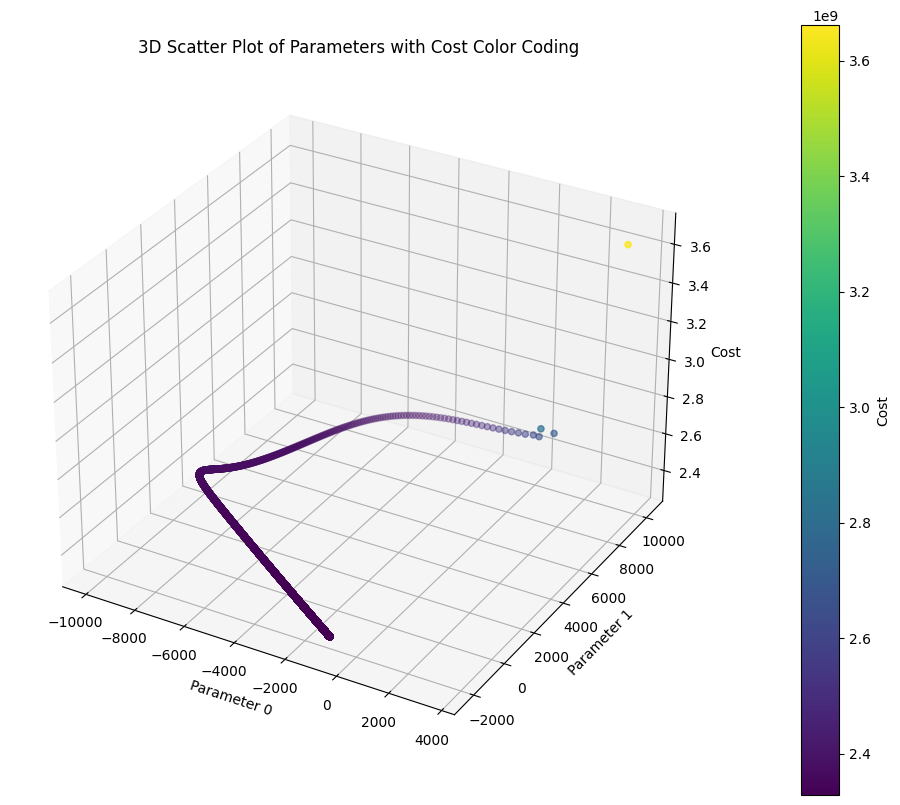

In [71]:
parameters_history = np.array(parameters_history)
cost_history = np.array(cost_history)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


scatter_plot = ax.scatter(parameters_history[:, 0], parameters_history[:, 1], cost_history, c=cost_history, cmap='viridis', marker='o')
ax.set_xlabel('Parameter 0')
ax.set_ylabel('Parameter 1')
ax.set_zlabel('Cost')
ax.set_title('3D Scatter Plot of Parameters with Cost Color Coding')


ax.grid(True)

cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
cbar.set_label('Cost')

plt.show()

**TriContour Plot**

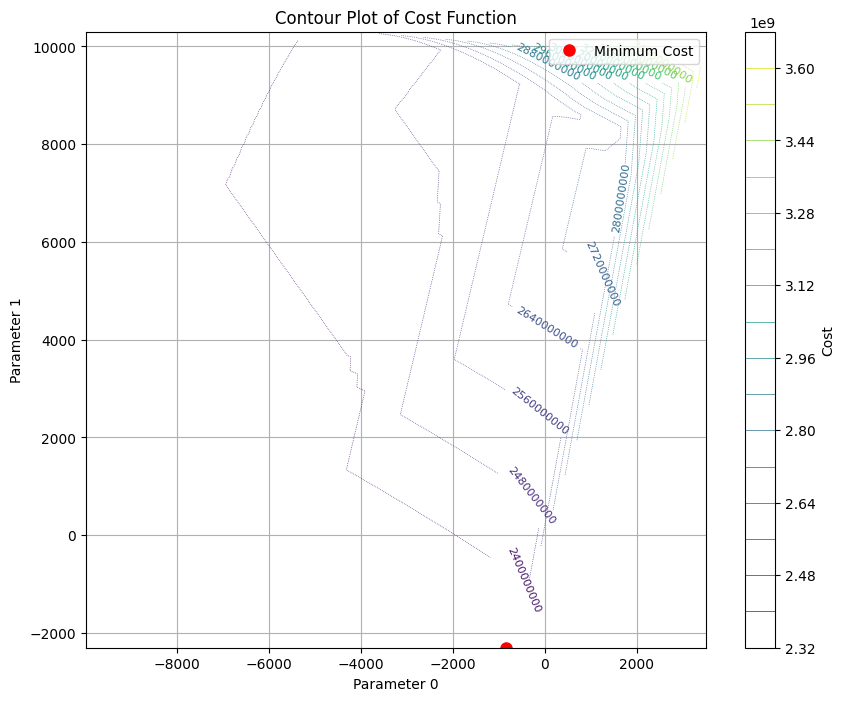

In [74]:


lowest_cost_index = np.argmin(cost_history)
triangulation = Triangulation(parameters_history[:, 0], parameters_history[:, 1])

plt.figure(figsize=(10, 8))

contour_plot = plt.tricontour(triangulation, cost_history, levels=20, cmap='viridis', linewidths=0.5, linestyles='dotted')

plt.plot(parameters_history[lowest_cost_index, 0], parameters_history[lowest_cost_index, 1], 'ro', label='Minimum Cost', markersize=8)
plt.xlabel('Parameter 0')
plt.ylabel('Parameter 1')
plt.title('Contour Plot of Cost Function')
plt.legend()
colorbar = plt.colorbar(contour_plot, label='Cost')


plt.clabel(contour_plot, inline=True, fontsize=8)

plt.grid(True)

plt.show()

## **Normal Equation (using the Dataset used in 1st section : Univariate Linear Regression:)**

In [73]:

trans_feature_matrix_dot_product = np.dot(feature_matrix.T, feature_matrix)


trans_feature_matrix_dot_target_vector = np.dot(feature_matrix.T, target_vector)

inverse_trans_feature_matrix_dot_product = np.linalg.inv(trans_feature_matrix_dot_product)

coefficients = np.dot(inverse_trans_feature_matrix_dot_product, trans_feature_matrix_dot_target_vector)


predicted_rent = np.dot(feature_matrix, coefficients)


rent_errors = predicted_rent - target_vector


mean_square_error_cost = np.sum(rent_errors**2) / (2 * len(target_vector))

print('Calculated coefficients = ', coefficients)
print('Mean square error cost = ', mean_square_error_cost)

Calculated coefficients =  [  -833.81586631  -2307.49253894 209475.1262127  -23388.1777726
   6426.81663365  23437.69656532]
Mean square error cost =  2328402243.394083
